<a href="https://colab.research.google.com/github/AtahoPrince/AtahoPrince/blob/main/Copy_of_final_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install tensorflow --upgrade --force-reinstall
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint, TensorBoard
import itertools
import datetime





In [2]:
# 1. Load Image Dataset
IMAGE_FOLDER = '/content/drive/MyDrive/Coffee_model/Coffee Leaf Diseases/Coffee leaf Diseases'
IMG_SIZE = (128, 128)  # Resize all images to 128x128

images = []
labels = []
class_names = os.listdir(IMAGE_FOLDER)

print(f"Detected Classes: {class_names}")



Detected Classes: ['Phoma', 'Healthy', 'Miner', 'Rust', 'Red Spider Mite']


In [3]:
for label, class_name in enumerate(class_names):
    class_folder = os.path.join(IMAGE_FOLDER, class_name)
    if os.path.isdir(class_folder):
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            try:
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
                img = cv2.resize(img, IMG_SIZE)  # Resize Image
                images.append(img)
                labels.append(label)
            except:
                print(f"Error loading {img_path}")

images = np.array(images) / 255.0  # Normalize Pixel Values
labels = np.array(labels)

print(f"Total Images Loaded: {len(images)}")



Total Images Loaded: 3766


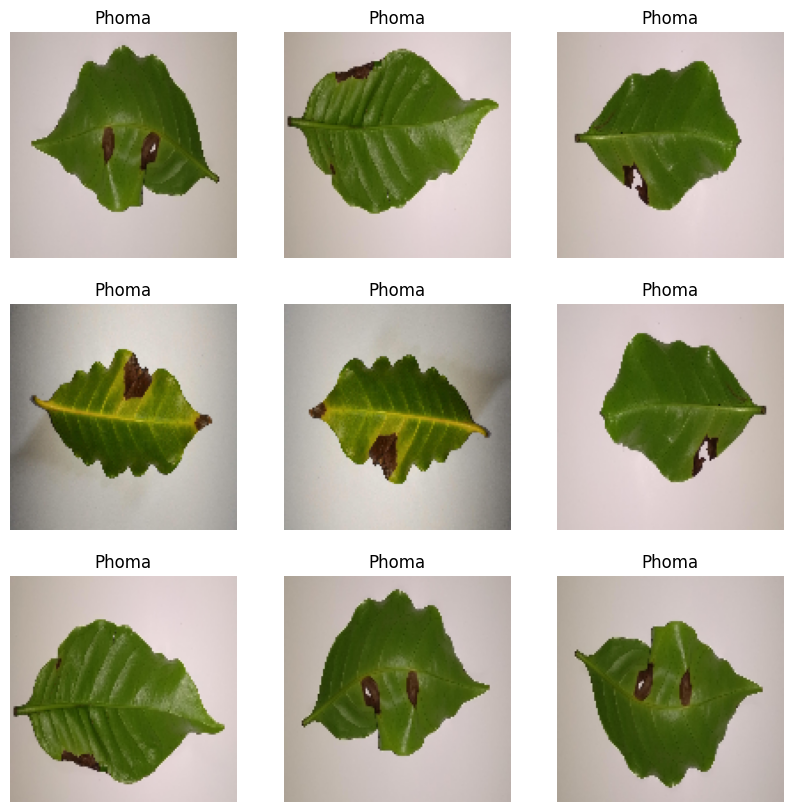

In [4]:
# 2. Visualize Sample Images
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()



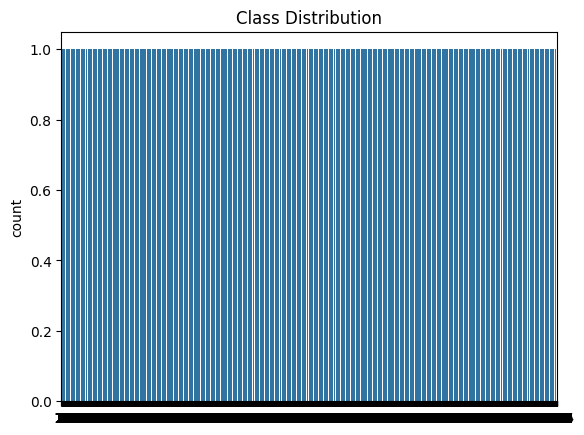

In [6]:
# 3. Class Distribution
sns.countplot(labels)
plt.title("Class Distribution")
plt.show()



In [5]:
# 4. Split Dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, stratify=labels, random_state=42)

print(f"Training Set: {len(X_train)} Images")
print(f"Test Set: {len(X_test)} Images")



Training Set: 2636 Images
Test Set: 1130 Images


In [13]:
# 5. Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2)

datagen.fit(X_train)




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,305,285 (12.61 MB)

 Trainable params: 3,305,285 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
base_model = keras.applications.MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights="imagenet")
base_model.trainable = False  # Freeze base layers

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])
# Compile the model
#model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#model.summary()
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_128 (Functional)    │ (None, 4, 4, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_5           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,422,597 (9.24 MB)

 Trainable params: 164,613 (643.02 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [19]:
# Learning Rate Scheduler
def lr_schedule(epoch):
    initial_lr = 0.001
    if epoch > 5:
        return initial_lr * 0.1
    return initial_lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# Model Checkpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, verbose=1)

# TensorBoard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)



In [27]:
# 7. Train Model with Data Augmentation and Callbacks
# Calculate the number of samples for validation
validation_samples = int(0.2 * len(X_train))

# Split the training data into training and validation sets
X_train_fit, X_val_fit, y_train_fit, y_val_fit = train_test_split(
    X_train, y_train, test_size=validation_samples, stratify=y_train, random_state=42
)

# Train the model using the split data
history = model.fit(
    datagen.flow(X_train_fit, y_train_fit, batch_size=32),
    epochs=25,
    validation_data=datagen.flow(X_val_fit, y_val_fit, batch_size=32), # Use validation_data instead of validation_split
    callbacks=[lr_scheduler, checkpoint, tensorboard_callback]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 777ms/step - accuracy: 0.3078 - loss: 1.8788
Epoch 1: val_accuracy did not improve from 0.83681
66/66 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.3094 - loss: 1.8726 - val_accuracy: 0.6471 - val_loss: 0.9420 - learning_rate: 0.0010
Epoch 2/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 720ms/step - accuracy: 0.5562 - loss: 1.0583
Epoch 2: val_accuracy did not improve from 0.83681
66/66 ━━━━━━━━━━━━━━━━━━━━ 61s 929ms/step - accuracy: 0.5566 - loss: 1.0577 - val_accuracy: 0.7173 - val_loss: 0.7605 - learning_rate: 0.0010
Epoch 3/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 703ms/step - accuracy: 0.6414 - loss: 0.8963
Epoch 3: val_accuracy did not improve from 0.83681
66/66 ━━━━━━━━━━━━━━━━━━━━ 60s 912ms/step - accuracy: 0.6414 - loss: 0.8961 - val_accuracy: 0.7495 - val_loss: 0.6962 - learning_rate: 0.0010
Epoch 4/25
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 702ms/step - accuracy: 0.6642 - loss: 0.8217
Epoch 4: val_accuracy did not improve from 0.83681
66/66 ━━━━━━━━━━━━━━━━━━━━ 61

In [28]:
# 8. Evaluate Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")




36/36 ━━━━━━━━━━━━━━━━━━━━ 23s 644ms/step - accuracy: 0.8023 - loss: 0.5596
Test Accuracy: 79.73%


36/36 ━━━━━━━━━━━━━━━━━━━━ 28s 738ms/step
Classification Report:
                 precision    recall  f1-score   support

          Phoma       0.97      0.83      0.90       145
        Healthy       0.79      0.82      0.80       358
          Miner       0.82      0.85      0.84       215
           Rust       0.74      0.84      0.78       362
Red Spider Mite       0.00      0.00      0.00        50

       accuracy                           0.80      1130
      macro avg       0.66      0.67      0.66      1130
   weighted avg       0.77      0.80      0.78      1130



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


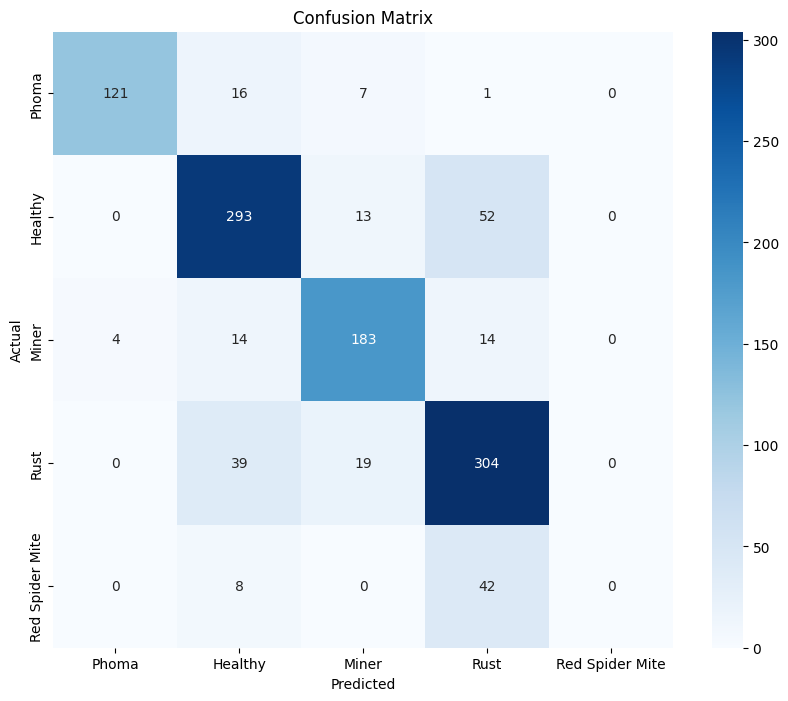

In [29]:
# 9. Confusion Matrix & Classification Report
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print("Classification Report:")
print(classification_report(y_test, y_pred_classes, target_names=class_names))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()



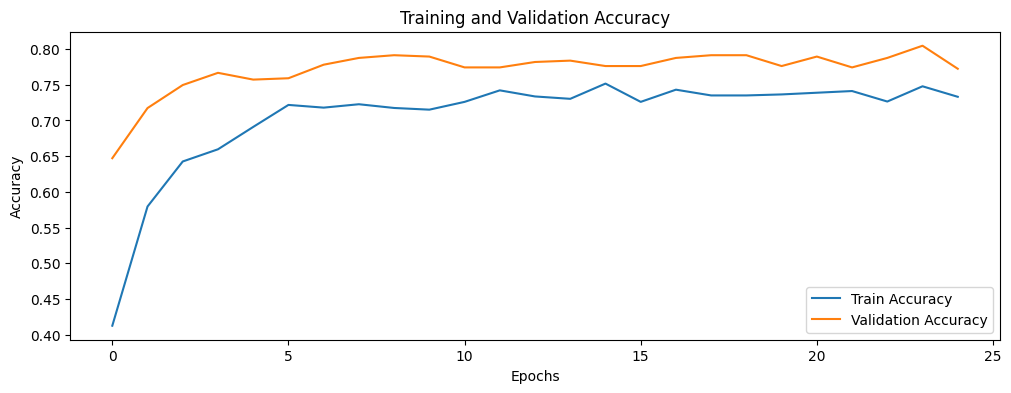

In [30]:
# 10. Plot Training History
plt.figure(figsize=(12, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




In [31]:
# 11. Save Final Model
model.save('image_detection_model.keras')
print("Final Model Saved Successfully")


Final Model Saved Successfully


In [70]:
def load_and_predict(image_path, model, class_names):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize
    img = np.array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get prediction probabilities
    prediction = model.predict(img)[0]  # Extract the first (and only) batch
    predicted_class = np.argmax(prediction)  # Get class with highest probability

    # Get class probabilities
    class_probs = {class_names[i]: round(prediction[i] * 100, 2) for i in range(len(class_names))}

    # Show image with top prediction
    plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Show image
    plt.title(f"Predicted: {class_names[predicted_class]} ({class_probs[class_names[predicted_class]]}%)")
    plt.axis("off")
    plt.show()
     # Print all class probabilities
    print("Prediction Confidence Scores:")
    for class_name, score in class_probs.items():
        print(f"{class_name}: {score:.2f}%")

    return class_names[predicted_class], class_probs





In [75]:
def load_and_predict(image_path, model, class_names):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
    img = cv2.resize(img, (128, 128))  # Resize
    img = np.array(img) / 255.0  # Normalize
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Get prediction probabilities
    prediction = model.predict(img)[0]  # Extract first (only) batch
    sorted_indices = np.argsort(prediction)[::-1]  # Sort indices in descending order

    # Get top 2 predictions
    top_2_indices = sorted_indices[:2]
    top_2_classes = [class_names[i] for i in top_2_indices]
    top_2_probs = [round(prediction[i] * 100, 2) for i in top_2_indices]

    # Display the image with top prediction
    plt.imshow(cv2.imread(image_path)[:, :, ::-1])  # Show image
    #plt.title(f"Predicted: {top_2_classes[0]} ({top_2_probs[0]}%)\n"
             # f"Second: {top_2_classes[1]} ({top_2_probs[1]}%)")
    plt.axis("off")
    plt.show()

    # Print all class probabilities
    print("Prediction Confidence Scores:")
    for i in sorted_indices:
        print(f"{class_names[i]}: {prediction[i] * 100:.2f}%")

    return top_2_classes, top_2_probs



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


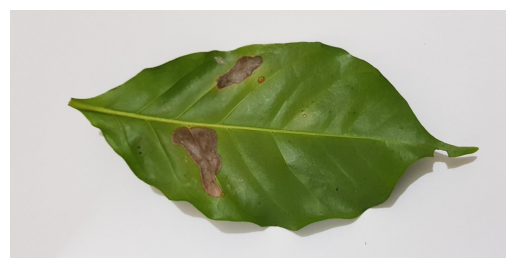

Prediction Confidence Scores:
Phoma: 46.83%
Miner: 30.74%
Healthy: 12.61%
Rust: 6.42%
Red Spider Mite: 3.39%
Predicted Class: ['Phoma', 'Miner']


In [86]:
# Load trained model
model = keras.models.load_model('image_detection_model.keras')

# Provide the path to an external image
image_path = '/content/drive/MyDrive/Coffee_model/test_data/content/test_data/Miner/1158.jpg'
predicted_label, probabilities = load_and_predict(image_path, model, class_names)

print(f"Predicted Class: {predicted_label}")
